In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import json

# Exploratory Data Analysis

After pulling data from the Yelp data set challenge, converting it to CSV files (other than the user file), and filtering out unneeded variables and removed all businesses that are not 'Restaurants' (by category). 

We will check the prevalence of tips, check-ins, and photos, but we suspect that only the reviews, users, and businesses data will be useful.

## Read in Data

In [2]:
checkins = pd.read_csv('Data/checkin_summary.csv', header=None)
photos = pd.read_csv('Data/photos_summary.csv', header=None)
reviews = pd.read_csv('Data/review_small.csv', header=None)
biz = pd.read_csv('Data/small_businesses.csv')
tips = pd.read_csv('Data/tip_summary.csv', header=None)
users = pd.read_json(path_or_buf='Data/user_small.json', lines=True)

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,10,12,14,20,63,64,74) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Clean Columns and Data

In [5]:
checkins.shape, photos.shape, reviews.shape, biz.shape, tips.shape, users.shape

((49414, 2), (26384, 2), (2927859, 4), (38668, 93), (558979, 3), (1183362, 7))

In [3]:
## Users: count years with elite status and convert join_date to DateTime
users['elite_count'] = users.iloc[:,1].apply(lambda x: len(x))
users['join_date'] = pd.to_datetime(users['yelping_since'])
users.head()

,average_stars,elite,review_count,user_id,yelping_since,elite_count,join_date
0,3.80,"[2014, 2016, 2013, 2011, 2012, 2015, 2010, 2017]",272,lsSiIjAKVl-QRxKjRErBeg,2010-07-13,8,2010-07-13
1,3.94,"[2014, 2017, 2011, 2012, 2015, 2009, 2013, 200...",2559,om5ZiponkpRqUNa3pVPiRg,2006-01-18,12,2006-01-18
2,4.72,[],277,-lGwMGHMC_XihFJNKCJNRg,2014-10-31,0,2014-10-31
3,3.76,"[2016, 2017]",436,D-ydMTPGWXTVm4_jjp0k9g,2013-04-01,2,2013-04-01
4,4.23,"[2017, 2016]",921,PcvbBOCOcs6_suRDH7TSTg,2012-08-16,2,2012-08-16


In [4]:
users.dtypes

average_stars           float64
elite                    object
review_count              int64
user_id                  object
yelping_since            object
elite_count               int64
join_date        datetime64[ns]
dtype: object

In [6]:
## Checkins: Add column headers
checkins.columns = ['business_id', 'num_checkins'] 
checkins.head()

,business_id,num_checkins
0,--6MefnULPED_I942VcFNA,122
1,--9e1ONYQuAa-CB_Rrw7Tw,2469
2,--DaPTJW3-tB1vP-PfdTEg,88
3,--FBCX-N37CMYDfs790Bnw,477
4,--GM_ORV2cYS-h38DSaCLw,13


In [7]:
## Photos: Add column headers
photos.columns = ['business_id', 'num_photos'] 
photos.head()

,business_id,num_photos
0,--6MefnULPED_I942VcFNA,1
1,--9e1ONYQuAa-CB_Rrw7Tw,127
2,--DaPTJW3-tB1vP-PfdTEg,1
3,--FBCX-N37CMYDfs790Bnw,4
4,--KCl2FvVQpvjzmZSPyviA,3


In [8]:
## Reviews: Add column headers and convert review_date to DateTime
reviews.columns = ['user_id', 'business_id', 'rating', 'date'] 
reviews['review_date'] = pd.to_datetime(reviews['date'])
reviews.head()

,user_id,business_id,rating,date,review_date
0,V2exkc2JwEdc8UNUNhT7sg,--6MefnULPED_I942VcFNA,5,2016-08-25,2016-08-25
1,j97y1ZAsYABIOcR0KQCy5Q,--6MefnULPED_I942VcFNA,1,2010-12-06,2010-12-06
2,8-KBKMJVO-j5YqpHb08j9w,--6MefnULPED_I942VcFNA,4,2015-08-05,2015-08-05
3,CxDOIDnH8gp9KXzpBHJYXw,--6MefnULPED_I942VcFNA,2,2010-12-22,2010-12-22
4,7Dykd1HolQx8mKPYhYDYSg,--6MefnULPED_I942VcFNA,2,2017-02-07,2017-02-07


In [9]:
## Business: Clean column names
biz.columns=biz.columns.str.replace('attributes.','')
biz.columns=biz.columns.str.replace('.',"_")
biz.head()

,Ambience_divey,HairSpecializesIn_kids,RestaurantsDelivery,Open24Hours,Ambience_trendy,DogsAllowed,CoatCheck,postal_code,Smoking,DietaryRestrictions_halal,...,RestaurantsReservations,DietaryRestrictions_dairy-free,BestNights_wednesday,DietaryRestrictions_vegan,Ambience_romantic,Music_jukebox,Ambience_upscale,RestaurantsTakeOut,BikeParking,OutdoorSeating
0,False,NaN,False,NaN,False,NaN,False,28105,NaN,NaN,...,False,NaN,NaN,NaN,False,False,False,True,True,False
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28164,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,True,NaN,False,NaN,False,NaN,NaN,15224,NaN,NaN,...,False,NaN,NaN,NaN,False,NaN,False,True,True,False
3,NaN,NaN,False,NaN,NaN,NaN,NaN,L5W 0E6,NaN,NaN,...,True,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,True
4,False,NaN,False,NaN,False,NaN,NaN,53704,NaN,NaN,...,True,NaN,NaN,NaN,False,NaN,False,True,True,False


In [10]:
## Tips: Add column headers and fix business_id, user_id
tips.columns = ['business_id', 'user_id', 'unidentifiedinfo_tips'] 

tips['business_id'] = tips['business_id'].map(lambda x: x[1:])
tips['user_id'] = tips['user_id'].map(lambda x: x[:-1])
tips.head()

,business_id,user_id,unidentifiedinfo_tips
0,---1lKK3aKOuomHnwAkAow,0zoXYHq82haayMaV952jEQ,1
1,---1lKK3aKOuomHnwAkAow,A0X1baHPgw9IiBRivu0G9g,2
2,---1lKK3aKOuomHnwAkAow,Qy_tDaVTWlS14fEglzo1Tg,1
3,---1lKK3aKOuomHnwAkAow,RRw9I8pHt5PzgYGT2QeODw,1
4,---1lKK3aKOuomHnwAkAow,Xspg78dOvuedvuPEUwZBjw,1


## Check the relevance of tips, photos, and users

In [11]:
# How many unique users are there in the tips data set?
print(len(tips.user_id.unique()))
print(len(tips.user_id.unique())/len(users))

43082
0.03640644198478572


Since these represent less than 4 percent of all users, we can disregard them for analysis.

In [21]:
#Merge business and photos for only the businesses in each set
photo_biz = pd.merge(photos, biz, on='business_id', how='inner')
# How many unique businesses are there in the combined data set?
print(len(photo_biz.business_id.unique()))
print(len(photo_biz.business_id.unique())/len(biz))

21480
0.5554980862728871


Here we see a much greater share of businesses with photos, but we still have barely over half of businesses with photos (so it may not be a good predictor of popularity across the data set.

In [22]:
#Merge business and checkins for only the businesses in each set
checkin_biz = pd.merge(checkins, biz, on='business_id', how='inner')
# How many unique businesses are there in the check-ins data set?
print(len(checkin_biz.business_id.unique()))
print(len(checkin_biz.business_id.unique())/len(biz))

37533
0.9706475638771077


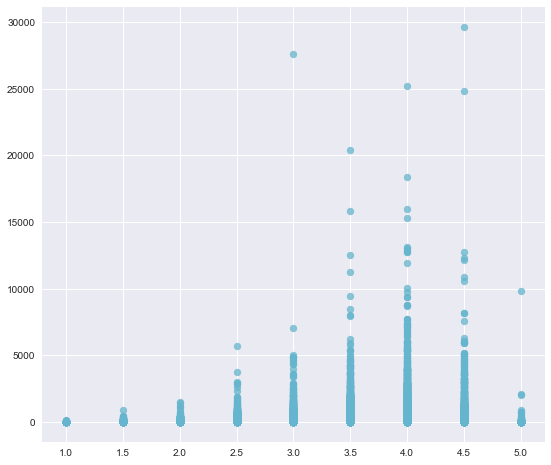

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(9, 8))

#plt.hist(checkin_biz.num_checkins[checkin_biz.num_checkins < 1000], bins = 100, color=sns.color_palette()[5], alpha=0.75)
#plt.title('Distribution of Number of Check-ins per Restaurant')

plt.scatter(checkin_biz.stars, checkin_biz.num_checkins, color=sns.color_palette()[5], alpha=0.75)


We see that check-ins matches up somewhat well to the average business rating, but we will see if other factors better describe ratings.

## Now the good stuff: Exploring User and Review Data

In [32]:
# Merge with review data
users_viz = users[['user_id', 'average_stars', 'review_count', 'elite_count', 'join_date']]
reviews_viz = reviews[['user_id', 'business_id', 'rating', 'review_date']]

In [33]:
user_review_viz = pd.merge(users_viz, reviews_viz, on='user_id', how='outer')

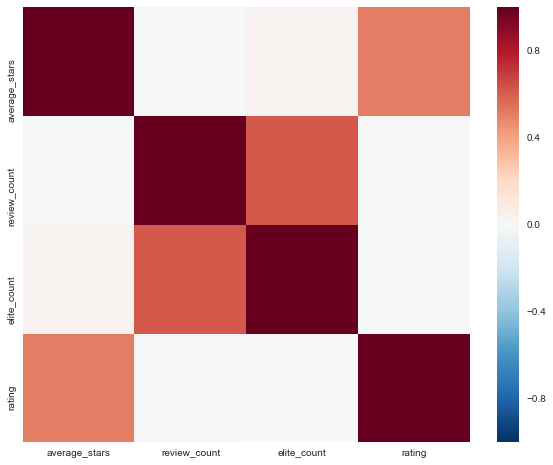

In [35]:
# Let's begin with a heat map of quantitative variables
fig, ax = plt.subplots(1,1, figsize =(10,8))
sns.heatmap(user_review_viz.corr(), ax=ax)

We see that average_stars and the given rating for a review correlate; meaning that there is some stickiness to a restaurant's overall review. We also see that review_count and elite_count correlate with one another, which makes sense, as Yelp likely selects elite users among those that review most often. However, neither are very important towards rating, so we'll leave those be for now.

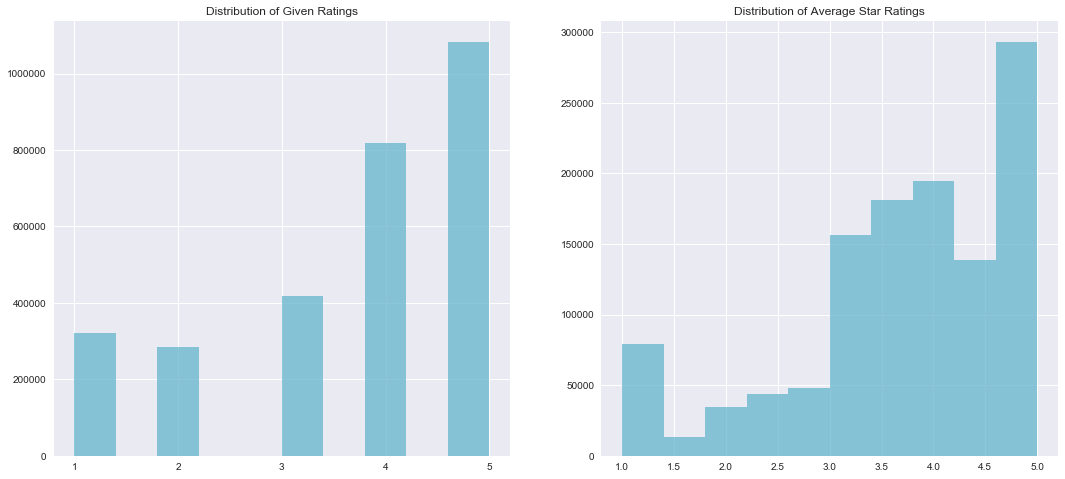

In [36]:
# How does the distribution of average rating compare to that of reviews
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

plt.subplot(1, 2, 1)
plt.hist(reviews_viz.rating, color=sns.color_palette()[5], alpha=0.75, align='mid')
plt.xticks([1,2,3,4,5])
plt.title('Distribution of Given Ratings')

plt.subplot(1, 2, 2)
plt.hist(users_viz.average_stars, color=sns.color_palette()[5], alpha=0.75)
plt.title('Distribution of Average Star Ratings')

Here, we begin to see the distribution of ratings. Corroborating the result above, the distribution of ratings and average_stars match one another quite closely.They're skewed towards higher ratings (4s and 5s). But how much so?

In [38]:
users.describe()

,average_stars,review_count,elite_count
count,1.183362e+06,1.183362e+06,1.183362e+06
mean,3.711835e+00,2.372686e+01,1.525848e-01
std,1.105231e+00,8.050645e+01,8.163861e-01
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.130000e+00,2.000000e+00,0.000000e+00
50%,3.890000e+00,5.000000e+00,0.000000e+00
75%,4.570000e+00,1.600000e+01,0.000000e+00
max,5.000000e+00,1.165600e+04,1.300000e+01


In [39]:
reviews.describe()

,rating
count,2.927859e+06
mean,3.702164e+00
std,1.343472e+00
min,1.000000e+00
25%,3.000000e+00
50%,4.000000e+00
75%,5.000000e+00
max,5.000000e+00


It's notable that the mean of rating and the median is 4, indicating that the distribution of reviews is skewed towards higher star ratings. 

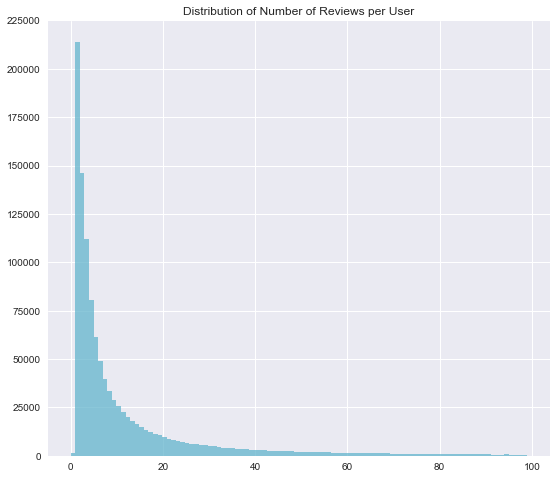

In [40]:
# What's the distribution of reviews?
fig, ax = plt.subplots(1, 1, figsize=(9, 8))

#plt.subplot(1, 2, 1)
plt.hist(users_viz.review_count[users_viz.review_count < 100], bins = 100, color=sns.color_palette()[5], alpha=0.75)
plt.title('Distribution of Number of Reviews per User')

We can also see that review_count follows an exponential decay function with a long tail—many users post just one or a handful of reviews with a small segment of very active users.

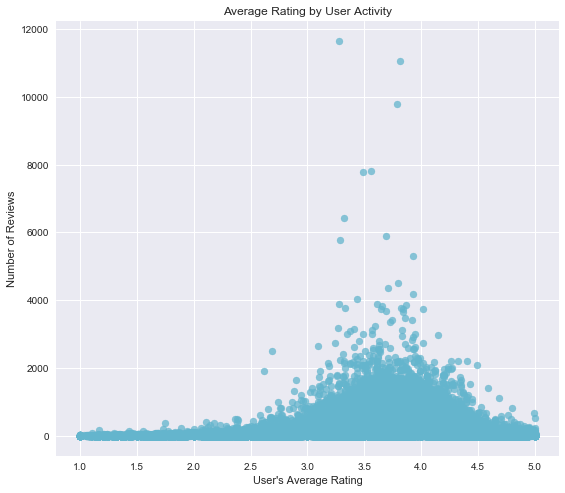

In [41]:
# Let's look at how the number of reviews moves with average ratings
fig, ax = plt.subplots(1, 1, figsize=(9, 8))
plt.scatter(users.average_stars, users.review_count, color=sns.color_palette()[5], alpha=0.75)
plt.xlabel("User's Average Rating")
plt.ylabel('Number of Reviews')
plt.title('Average Rating by User Activity')

In [42]:
# Finally, let's see if there is a variation in star ratings by elite status

#Calculate shares of ratings by elite status
elite_lvl = np.array(user_review_viz['elite_count'].unique())
elite_lvl.sort()

rating_props_1star = [user_review_viz.rating[(user_review_viz.rating == 1) & (user_review_viz.elite_count == i)].count()/user_review_viz.rating[user_review_viz.elite_count == i].count() for i in range(0,14)]
rating_props_2star = [user_review_viz.rating[(user_review_viz.rating == 2) & (user_review_viz.elite_count == i)].count()/user_review_viz.rating[user_review_viz.elite_count == i].count() for i in range(0,14)]
rating_props_3star = [user_review_viz.rating[(user_review_viz.rating == 3) & (user_review_viz.elite_count == i)].count()/user_review_viz.rating[user_review_viz.elite_count == i].count() for i in range(0,14)]
rating_props_4star = [user_review_viz.rating[(user_review_viz.rating == 4) & (user_review_viz.elite_count == i)].count()/user_review_viz.rating[user_review_viz.elite_count == i].count() for i in range(0,14)]
rating_props_5star = [user_review_viz.rating[(user_review_viz.rating == 5) & (user_review_viz.elite_count == i)].count()/user_review_viz.rating[user_review_viz.elite_count == i].count() for i in range(0,14)]

([<matplotlib.axis.XTick at 0x13ddcce10>,
 <a list of 14 Text xticklabel objects>)

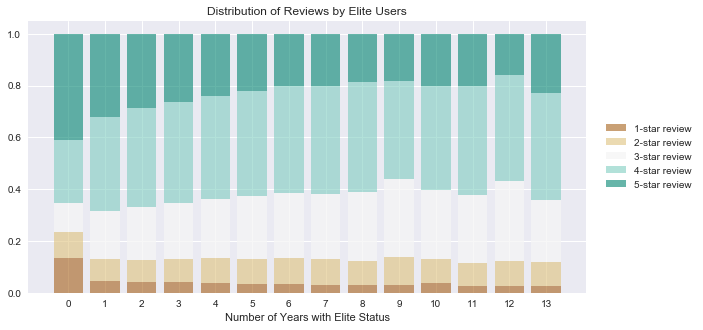

In [43]:
f, ax = plt.subplots(1, figsize=(10,5))

ax.bar(elite_lvl, rating_props_1star, label = '1-star review', alpha=0.6, color = '#a6611a')
ax.bar(elite_lvl, rating_props_2star, bottom = rating_props_1star, label = '2-star review', alpha=0.6, color = '#dfc27d')
ax.bar(elite_lvl, rating_props_3star, bottom = [i+j for i,j in zip(rating_props_1star, rating_props_2star)], label = '3-star review', alpha=0.8, color = '#f5f5f5')
ax.bar(elite_lvl, rating_props_4star, bottom = [i+j+k for i,j,k in zip(rating_props_1star, rating_props_2star, rating_props_3star)], label = '4-star review', alpha=0.6, color = '#80cdc1')
ax.bar(elite_lvl, rating_props_5star, bottom = [i+j+k+l for i,j,k,l in zip(rating_props_1star, rating_props_2star, rating_props_3star, rating_props_4star)], label = '5-star review', alpha=0.6, color = '#018571')

plt.xlabel("Number of Years with Elite Status")
plt.title('Distribution of Reviews by Elite Users')
plt.legend(bbox_to_anchor = (1.02,0.5) , loc = 'center left')
plt.xticks(range(0,14))

In [44]:
users.elite[users.elite_count > 0].count()/len(users)

0.047425048294604692

We find that those without Elite status are more likely to give 1- or 5-star reviews (which follows one-and-done angry/happy reviewers). However a very small share of users (4.7%) ever reach elite status.

## Exploring Restaurant and Review Data

In [45]:
#Merge reviews and business for only the businesses in each set
full_biz = pd.merge(reviews, biz, on='business_id', how='inner')

In [46]:
full_biz.shape, reviews.shape, biz.shape

#Caused a drop of 2927859 - 2531183

((2531183, 97), (2927859, 5), (38668, 93))

In [47]:
#Drop where more than 50 percent (1,265,591) missing
full_biz = full_biz.dropna(thresh=len(full_biz) - 1265591, axis=1)
full_biz.shape

(2531183, 53)

By dropping features with more than 50 percent of missing records, we've gotten rid of 44 inconsistently available features. We have to do this because we're not sure if those features are missing because they should be `False`, but we can't be sure if that information is missing inconsistently. 

In [48]:
#Create list of variable types so we can continue cleaning. 

binary_vars = ["Caters","RestaurantsReservations","Ambience_romantic","Ambience_upscale",
               "RestaurantsTakeOut","BikeParking","OutdoorSeating","BusinessParking_lot","HasTV","GoodForMeal_dinner",
               "BusinessParking_street","GoodForMeal_breakfast","BusinessParking_garage","BusinessParking_valet",
               "WheelchairAccessible","Ambience_intimate","Ambience_hipster","BusinessAcceptsCreditCards",
               "GoodForMeal_brunch","Ambience_classy","RestaurantsTableService","GoodForMeal_latenight",
               "GoodForMeal_dessert","Ambience_touristy","BusinessParking_validated","GoodForMeal_lunch",
               "RestaurantsGoodForGroups","GoodForKids","Ambience_casual","Ambience_divey","RestaurantsDelivery",
               "Ambience_trendy"]

text_vars = ["user_id","business_id","postal_code","city","categories",
             "name","neighborhood","state"]

float_vars = ["latitude","longitude","is_open","rating","stars","review_count","RestaurantsPriceRange2"]

cat_vars = ["Alcohol","WiFi","NoiseLevel","RestaurantsAttire"]

date_vars = ['date']

In [49]:
#Create datasets that contain just the datatypes we want, as the correct datatypes. 

for var in binary_vars:
    full_biz[var] = 1*full_biz[var]
    
binary_df = full_biz[binary_vars].replace(np.nan, np.nan, regex=True)

for var in text_vars:
    full_biz[var] = full_biz[var].replace(np.nan, '', regex=True)
    full_biz[var] = full_biz[var].astype(str)
    
text_df = full_biz[text_vars]

for var in cat_vars:
    full_biz[var] = full_biz[var].replace(np.nan, '', regex=True)
    full_biz[var] = full_biz[var].astype(str)
    
cat_df = full_biz[cat_vars]

for var in date_vars:
    full_biz[var] = full_biz[var].replace(np.nan, '', regex=True)
    full_biz[var] = full_biz[var].astype(str)
    
date_df = full_biz[date_vars]

for var in float_vars:
    full_biz[var] = 1*full_biz[var]
    
float_df = full_biz[float_vars].replace(np.nan, np.nan, regex=True)

In [50]:
# Create data for all variables of interest
full_biz2 = binary_df.join(text_df)
full_biz2 = full_biz2.join(float_df)
full_biz2 = full_biz2.join(cat_df)
full_biz2 = full_biz2.join(date_df)

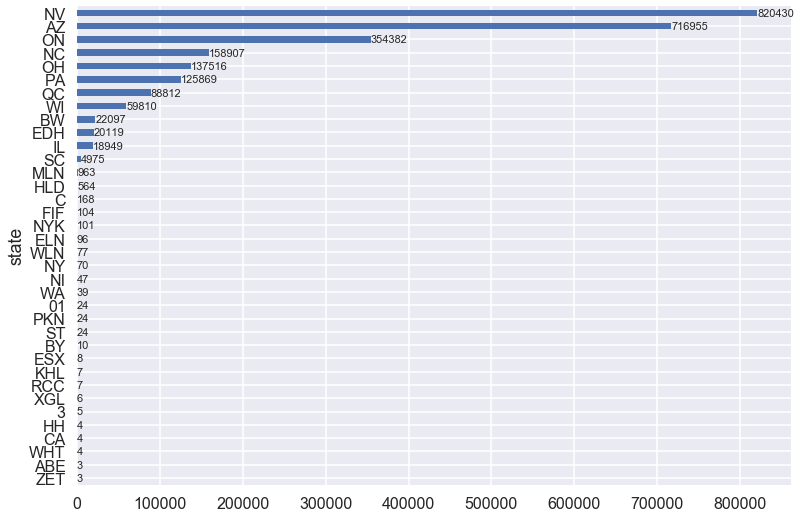

In [53]:
# What states do we have the most data for
count_states = full_biz2.groupby('state').is_open.sum().sort_values()

with sns.plotting_context("poster"):
    ax = plt.gca()
    count_states.plot(kind="barh")
    plt.grid(axis = 'x', color ='white', linestyle='-')
    ax.tick_params(axis='both', which='both',length=0)
    states = count_states.index
    counts = count_states.values
    nums = np.arange(len(count_states))
    for p, c, ch in zip(nums, states, counts):
        plt.annotate(str(ch), xy=(ch + 1, p), va='center', size=11)
    sns.despine(left=True, bottom=True)

Here we see a number of unexpected states (based on what we were told we would receive). In addition, many of these only have a handful of reviews. Let's zoom in a little to the 9 states with the most number of reviews.

In [54]:
#Select NV, AZ, ON, NC, OH, PA, QC, WI, BW

states = ['NV','AZ','ON','NC','OH','PA','QC','WI','BW']
geo_subset_biz = full_biz2[full_biz2['state'].isin(['NV','AZ','ON','NC','OH','PA','QC','WI','BW'])]


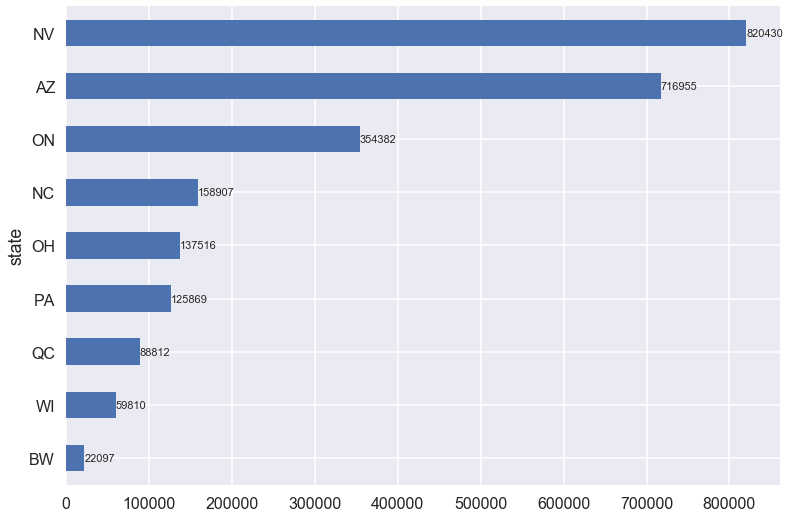

In [55]:
count_states2 = geo_subset_biz.groupby('state').is_open.sum().sort_values()

with sns.plotting_context("poster"):
    ax = plt.gca()
    count_states2.plot(kind="barh")
    plt.grid(axis = 'x', color ='white', linestyle='-')
    ax.tick_params(axis='both', which='both',length=0)
    states = count_states2.index
    counts = count_states2.values
    nums = np.arange(len(count_states))
    for p, c, ch in zip(nums, states, counts):
        plt.annotate(str(ch), xy=(ch + 1, p), va='center', size=11)
    sns.despine(left=True, bottom=True)

There is particularly a big drop off between Wisconsin and Baden-Württemberg, so we will continue analysis only with the top 8 states: NV, AZ, ON, NC, OH, PA, QC, and WI (they also all happen to be in North America).

In [56]:
# Next, let's look at categories, to see if the field is distinct and descriptive enough for us to use.
geo_subset_biz.categories=geo_subset_biz.categories.str.replace('[',"")
geo_subset_biz.categories=geo_subset_biz.categories.str.replace(']',"")
geo_subset_biz.categories=geo_subset_biz.categories.str.replace("'","")
#biz.columns=biz.columns.str.replace('[',"")
geo_subset_biz.categories.unique()
len(geo_subset_biz.categories.unique())

/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


18557

With 18,557 different categories, we have way too many to begin to parse. It also becomes difficult because most businesses have multiple categories, so we may have to implement some kind of decision rule on which to choose. 

In [57]:
uniques = list(geo_subset_biz.categories.unique())
newlist = []
for word in uniques:
    word = word.split(",")
    #word = word.replace(' ','')
    newlist.extend(word)  # <----

newlist = [x.strip(' ') for x in newlist]

newlist

df = pd.value_counts(newlist).to_frame().reset_index()
df

,index,0
0,Restaurants,18546
1,Food,6546
2,Nightlife,4702
3,Bars,4538
4,American (Traditional),3129
5,Sandwiches,2895
6,Breakfast & Brunch,2434
7,American (New),2130
8,Burgers,1693
9,Pizza,1690


We see that this gets messy very quickly. Let's move on.

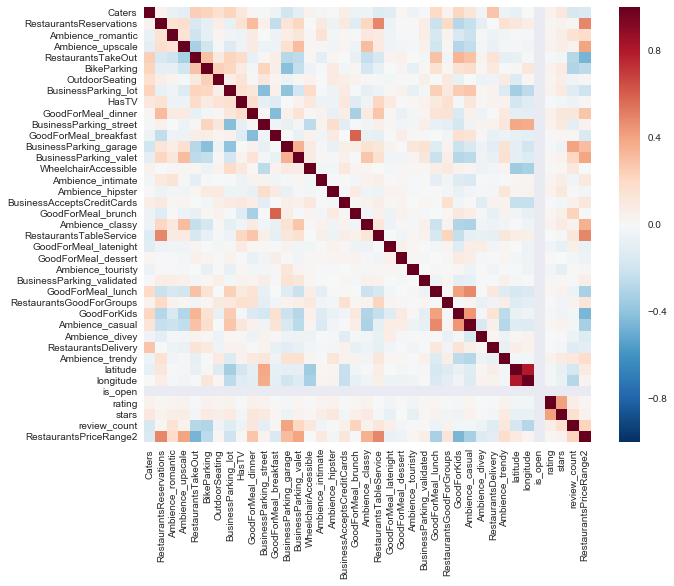

In [58]:
# Heatmap to understand correlations between the variables that we have in this data set.
fig, ax = plt.subplots(1,1, figsize =(10,8))
sns.heatmap(geo_subset_biz.corr(), ax=ax)

We see some obvious connections: restaurants that are good for breakfast are positively correlated with those that are good for brunch; restaurants that take reservations are both pricier and have table service (are are negatively correlated with takeout); casual restaurants are generally those that are good for kids (but pricey restaurants are not; and, for whatever reason, latitude and longitude are highly correlated. Unfortunately, we don't see much correlation for given rating (`stars`) other than business average (`rating`). However, this gives us some confidence that our baseline model with only user average and business average should do a relatively good job predicting given stars (compared to the other factors in this data). 

In [59]:
# Out of interest, we will look at one more plot- how restaurants good for different kinds of meals are distributed
# by average star rating

goodfor_list = ['GoodForKids','GoodForMeal_breakfast','GoodForMeal_brunch','GoodForMeal_dessert','GoodForMeal_dinner',
               'GoodForMeal_latenight','GoodForMeal_lunch']

def plot_relevant_question(dataframe, ax, criteria_label, title_to_use, boolean_query=True):
    df = dataframe.copy()
    
    if boolean_query:
        df = df.loc[df[criteria_label] == 1.0]
        plt.xlabel("rating")
        #fig.title(title_to_use, fontsize=24)
        #plt.hist(df.rating, ax=ax, color=sns.color_palette()[5], alpha=0.75, align='mid')
        df['rating'].plot(kind='hist', ax=ax, alpha=0.3, title=title_to_use,fontsize=22 )
        #plt.title(title_to_use, fontsize = 24)
        #df['rating'].plot(kind='hist', ax=ax, alpha=0.3, title=title_to_use, fontsize=24 )
        ax.set_ylim(0,600000)
        ax.set_title(title_to_use, fontsize=24)
        ax.set_xlabel("rating", fontsize=20)
        ax.set_ylabel("frequency", fontsize=20)
        #ax.xlabel("rating")
        #ax.title(fontsize=24)
        #ax.legend(loc='best')

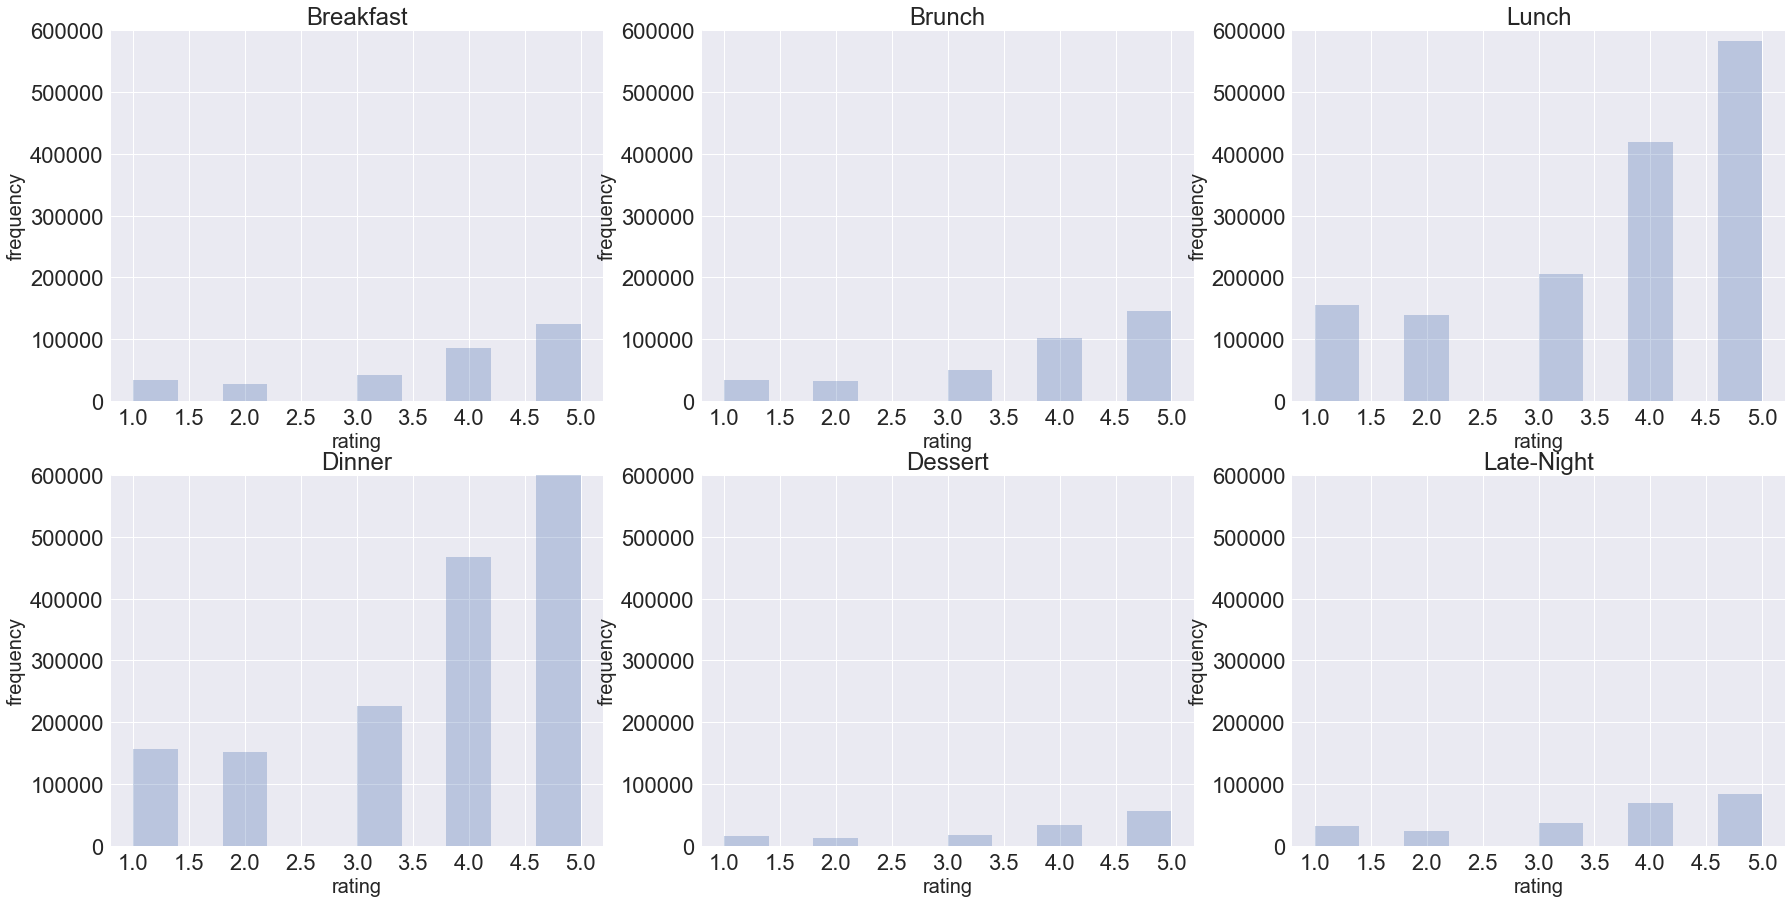

In [60]:
fig, ax = plt.subplots(2,3,figsize=(30,15))
#ax.set_ylim([0,600000])
ax = ax.flatten()



plot_relevant_question(geo_subset_biz, ax[0],'GoodForMeal_breakfast', 'Breakfast')
plot_relevant_question(geo_subset_biz, ax[1],'GoodForMeal_brunch', 'Brunch')
plot_relevant_question(geo_subset_biz, ax[2], 'GoodForMeal_lunch', 'Lunch')
plot_relevant_question(geo_subset_biz, ax[3], 'GoodForMeal_dinner', 'Dinner')
plot_relevant_question(geo_subset_biz, ax[4], 'GoodForMeal_dessert', 'Dessert')
plot_relevant_question(geo_subset_biz, ax[5], 'GoodForMeal_latenight', 'Late-Night')


plt.show()

We see that these distributions roughly follow what we see of star ratings in general, but that many more places are good for lunch and dinner than any other category. This may be an argument against using these factors.

We will continue on with our analysis using the recommended procedures set out in the project description: baseline linear regression using average user and business ratings, regularization regressions, matrix factorization using alternating least squares, and an additional model using k-NN and Pearson's R to calculate distance. Because this data can get very large very quickly, we will try to choose a market of manageable size, such as Ohio. We also see value in cutting out infrequent users from our data, as we are not sure they positively contribute to our analysis. For the sake of efficiency, we will conduct our analysis on those users that have at least 150 reviews in in the reviews data set.